In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

sns.set(style="whitegrid")


## Step 1: Load and Inspect the Dataset
Check shape, missing values, duplicates, data types, and summary statistics.


In [5]:
# Load dataset
df = pd.read_csv("customer_data.csv")

# Basic inspection
print("Shape of dataset:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Duplicate entries:", df.duplicated().sum())
print("Data types:\n", df.dtypes)
df.describe()


Shape of dataset: (2000, 7)
Missing values:
 Customer_subtype      0
Number_of_houses      0
Avg_size_household    0
Avg_age               0
Customer_main_type    0
Avg_Salary            0
label                 0
dtype: int64
Duplicate entries: 0
Data types:
 Customer_subtype      object
Number_of_houses       int64
Avg_size_household     int64
Avg_age               object
Customer_main_type    object
Avg_Salary             int64
label                  int64
dtype: object


,Number_of_houses,Avg_size_household,Avg_Salary,label
count,2000.000000,2000.000000,2.000000e+03,2000.000000
mean,1.107500,2.689500,1.616908e+06,0.060500
std,0.387323,0.791456,6.822648e+06,0.238471
min,1.000000,1.000000,1.361000e+03,0.000000
25%,1.000000,2.000000,2.034650e+04,0.000000
50%,1.000000,3.000000,3.142800e+04,0.000000
75%,1.000000,3.000000,4.295100e+04,0.000000
max,10.000000,5.000000,4.891990e+07,1.000000


## Step 2: Data Preprocessing
Standardize features to bring them to the same scale.


In [ ]:
features = ['Age', 'Annual Income', 'Spending Score']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Step 3: Find Optimal Number of Clusters using Elbow Method


In [8]:
# Convert Avg_age to numeric if needed
if df['Avg_age'].dtype == 'object':
    df['Avg_age'] = pd.to_numeric(df['Avg_age'].str.extract(r'(\d+)', expand=False), errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)


## Step 5: Feature Selection
We will select relevant numerical features for clustering.


In [9]:
features = ['Avg_age', 'Avg_Salary', 'Avg_size_household']
X = df[features]


## Step 6: Feature Scaling
Standardize the selected features before applying KMeans.


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Step 7: Elbow Method
Determine the optimal number of clusters using the Elbow method.


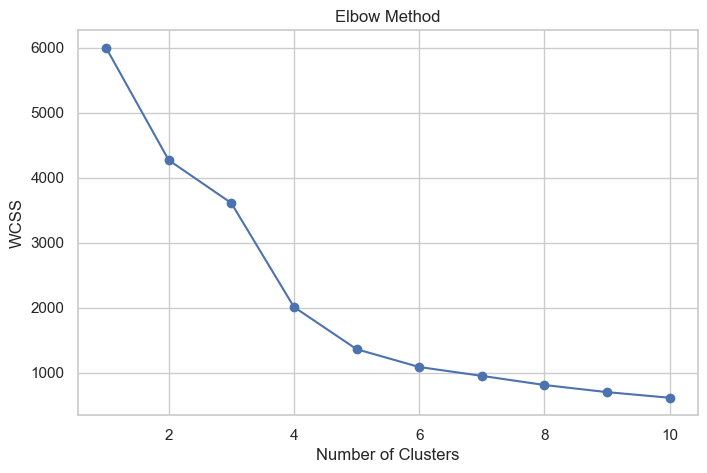

In [12]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


## Step 8: Silhouette Score
Evaluate clustering performance for different values of `k`.


In [13]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score for k={k}: {score:.4f}")


Silhouette Score for k=2: 0.4105
Silhouette Score for k=3: 0.3915
Silhouette Score for k=4: 0.4732
Silhouette Score for k=5: 0.5816
Silhouette Score for k=6: 0.6579
Silhouette Score for k=7: 0.6569
Silhouette Score for k=8: 0.6829
Silhouette Score for k=9: 0.6983
Silhouette Score for k=10: 0.7439


## Step 9: Apply KMeans Clustering
We apply KMeans with the optimal number of clusters found earlier.


In [14]:
optimal_k = 4  # Adjust this if a different k is found optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


## Step 10: PCA for Visualization
Visualize the clusters in 2D using Principal Component Analysis (PCA).


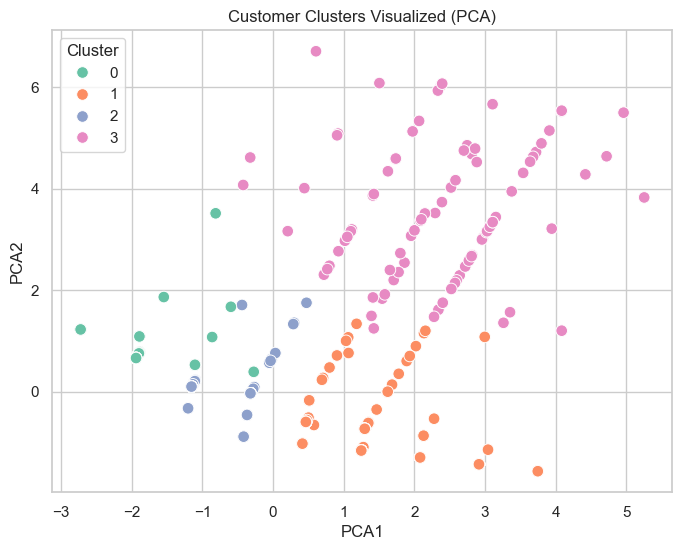

In [15]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=70)
plt.title("Customer Clusters Visualized (PCA)")
plt.show()


## Step 11: Pair Plot
Explore relationships between features colored by cluster.


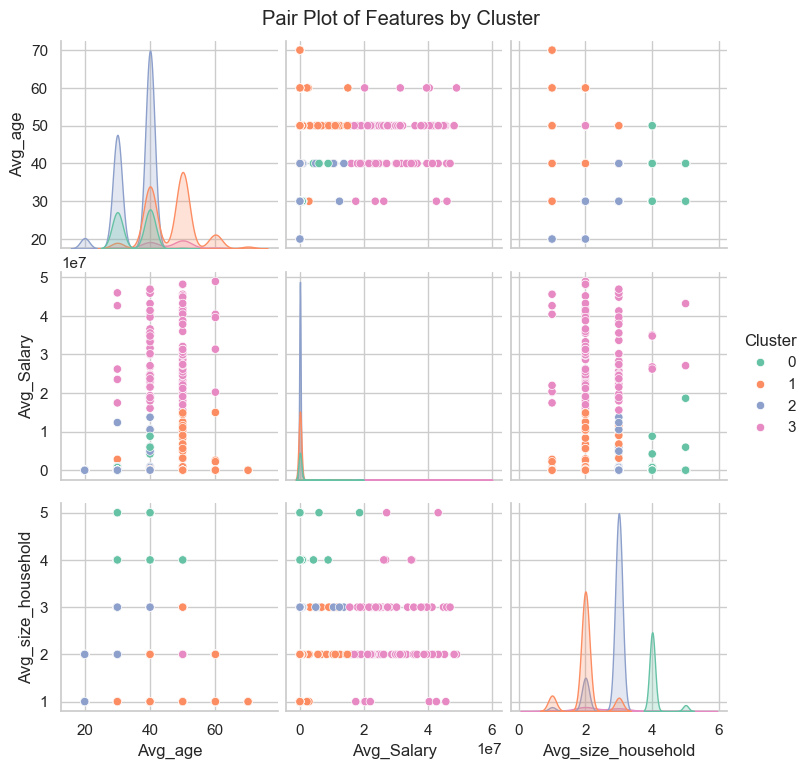

In [17]:
sns.pairplot(df[features + ['Cluster']], hue='Cluster', palette='Set2')
plt.suptitle("Pair Plot of Features by Cluster", y=1.02)
plt.show()


## Step 12: Visualize Cluster Centroids
Display the average feature values for each cluster.


In [ ]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=features)
centroid_df.index.name = 'Cluster'
centroid_df.plot(kind='bar', figsize=(8,6))
plt.title("Cluster Centroids")
plt.ylabel("Original Scale")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()
